# 1. 데이터 통합

In [7]:
import pandas as pd

# 파일 경로 설정
congestion_file_path = "서울교통공사_지하철혼잡도정보_20241231.csv"
facilities_file_path = "서울교통공사_편의시설 현황_20200917.csv"

# 데이터 로드 (한글 인코딩 처리)
congestion_df = pd.read_csv(congestion_file_path, encoding='cp949')
facilities_df = pd.read_csv(facilities_file_path, encoding='cp949')

In [9]:
print(congestion_df.head())
print(facilities_df.head())

   연번  요일구분  호선  역번호     출발역  상하구분  5시30분  6시00분  6시30분  7시00분  ...  20시00분  \
0   1   평일    1  150    서울역    상선     8.6   20.9   20.3   33.1  ...    19.2   
1   2   평일    1  151     시청    상선     8.6   15.5   17.0   26.7  ...    23.1   
2   3   평일    1  152     종각    상선     8.4   12.5   10.8   18.1  ...    30.1   
3   4   평일    1  153   종로3가    상선     7.1   13.8   10.8   18.7  ...    30.6   
4   5   평일    1  154   종로5가    상선     6.6   12.4    8.8   14.0  ...    32.4   

   20시30분  21시00분  21시30분  22시00분  22시30분  23시00분  23시30분  00시00분  00시30분  
0    18.5    19.0    15.3    16.3    17.9    12.7    12.1     6.5     0.9  
1    22.9    23.7    18.5    20.5    20.4    17.4    13.7     6.9     1.0  
2    29.7    32.5    24.8    27.0    26.4    24.1    15.9     7.7     1.0  
3    32.0    38.6    27.4    30.2    30.0    26.9    18.0     7.9     1.0  
4    33.5    39.1    33.5    31.5    27.7    27.2    17.5    12.6     2.6  

[5 rows x 45 columns]
   역번호    역명 외부역번호    호선 문화공간여부 휠체어리프트여부 만남의장소

In [11]:
# 필요한 편의시설 컬럼 리스트 
facility_columns = ['역번호', '문화공간여부', '휠체어리프트여부', '만남의장소여부', '환승주차장여부',
                    '자전거보관소여부', '엘리베이터여부', '기차예매역여부', '무인민원발급기여부', 
                    '환전키오스크여부', '수유실여부']

In [13]:
# 편의시설 데이터에서 필요한 데이터만 추출
facilities_df_selected = facilities_df[facility_columns].copy()

In [15]:
# 역번호 컬럼 데이터 타입 통일 (쉼표 제거 및 정수형 변환)
congestion_df['역번호'] = congestion_df['역번호'].astype(str).str.replace(',', '').astype(int)
facilities_df_selected['역번호'] = facilities_df_selected['역번호'].astype(str).str.replace(',', '').astype(int)

In [17]:
# 혼잡도 데이터를 기준으로 left join 병합 
merged_df = pd.merge(congestion_df, facilities_df_selected, on="역번호", how="left")

In [19]:
# 병합 후 편의시설이 없는 역번호에 대해 'N'으로 채우기
for col in facility_columns[1:]:
    merged_df[col] = merged_df[col].fillna('N')

In [21]:
# 최종 역번호를 정수형으로 변환
merged_df['역번호'] = merged_df['역번호'].astype(int)

In [ ]:
# 새로운 병합된 데이터 저장
output_file_path = "서울교통공사_지하철_혼잡도_및_편의시설_병합.csv"
merged_df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

In [84]:
import pandas as pd

# 최종병합 데이터 드드
df = pd.read_csv("C:\\Users\\jeong\\바탕 화면\\논문\\서울교통공사_지하철_혼잡도_및_편의시설_병합.csv", encoding='utf-8-sig')

In [86]:
# 칼럼별 공백제거
df['요일구분'] = df['요일구분'].str.strip()
df['출발역'] = df['출발역'].str.strip()
df['상하구분'] = df['상하구분'].str.strip()

In [88]:
# 결측값을 0으로 대체 - 열차에 사람이 없는 경우
df.fillna(0, inplace=True)

In [90]:
# 요약 통계량 확인
print(df.describe())
# 결측값 확인
print(df.isnull().sum())

               연번           호선          역번호        5시30분        6시00분  \
count  1662.00000  1662.000000  1662.000000  1662.000000  1662.000000   
mean    831.50000     4.613718  1617.747292    16.308303    16.640493   
std     479.92239     2.009311  1173.380051    14.952089    11.756898   
min       1.00000     1.000000   150.000000     0.000000     0.000000   
25%     416.25000     3.000000   317.000000     7.300000     9.100000   
50%     831.50000     5.000000  2528.000000    11.800000    14.200000   
75%    1246.75000     6.000000  2641.000000    21.075000    21.000000   
max    1662.00000     8.000000  2828.000000   117.800000    77.600000   

             6시30분        7시00분        7시30분        8시00분        8시30분  ...  \
count  1662.000000  1662.000000  1662.000000  1662.000000  1662.000000  ...   
mean     15.634116    19.744585    25.660349    32.566125    31.428039  ...   
std      12.609300    18.697326    24.957289    29.045806    24.765751  ...   
min       0.000000     0.0

In [37]:
print(df[facility_cols].dtypes)  # 데이터 타입 확인
print(df[facility_cols].head(10))  # 실제 값 확인


문화공간여부       object
휠체어리프트여부     object
만남의장소여부      object
환승주차장여부      object
자전거보관소여부     object
엘리베이터여부      object
기차예매역여부      object
무인민원발급기여부    object
환전키오스크여부     object
수유실여부        object
dtype: object
  문화공간여부 휠체어리프트여부 만남의장소여부 환승주차장여부 자전거보관소여부 엘리베이터여부 기차예매역여부 무인민원발급기여부 환전키오스크여부  \
0      N        Y       N       N        N       Y       N         N        N   
1      N        N       N       N        N       Y       N         N        N   
2      N        N       N       N        Y       Y       N         Y        N   
3      N        N       N       N        N       Y       N         N        N   
4      N        N       N       N        N       Y       N         N        N   
5      N        N       Y       N        Y       Y       N         N        N   
6      N        Y       N       N        N       Y       N         N        N   
7      N        N       N       N        Y       Y       N         N        N   
8      N        Y       N       N        N       Y       

# 2. 데이터 EDA

## 2-1. 데이터간 상관관계 분석

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18576\3631802568.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[facility_cols] = df[facility_cols].fillna('N').applymap(lambda x: 1 if x == 'Y' else 0)


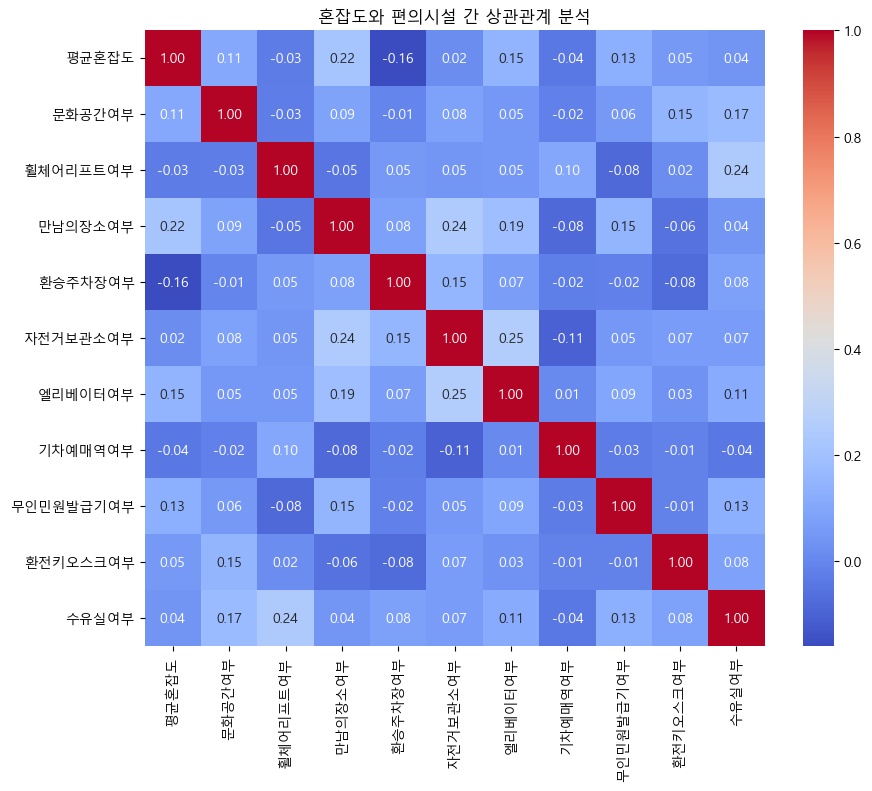

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 편의시설 관련 컬럼 추출
facility_cols = df.loc[:, '문화공간여부':'수유실여부'].columns

# Y/N 값을 1/0으로 변환
df[facility_cols] = df[facility_cols].fillna('N').applymap(lambda x: 1 if x == 'Y' else 0)

# 시간대별 혼잡도 평균 계산
time_columns = df.loc[:, '5시30분':'00시30분'].columns
df['평균혼잡도'] = df[time_columns].mean(axis=1)

# 혼잡도와 편의시설의 상관관계 분석
correlation_matrix = df[['평균혼잡도'] + list(facility_cols)].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('혼잡도와 편의시설 간 상관관계 분석')
plt.show()

- 1에 가까울수록: 두 변수 간 강한 양의 상관관계(편의시설이 많을수록 혼잡도가 높아짐)
- 1에 가까울수록: 두 변수 간 강한 음의 상관관계(편의시설이 많을수록 혼잡도가 낮아짐)
- 0에 가까울수록: 두 변수 간 관계가 거의 없음(독립적)


[결론]
- 최대가 0.25 정도로 편의시설과 혼잡도의 선형적인 연관성은 거의 없는 것으로 보임

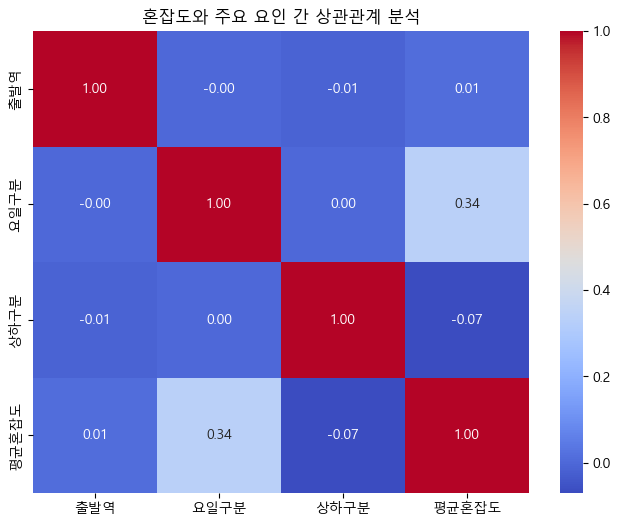

In [108]:
# 평균 혼잡도 계산
time_columns = df.loc[:, '5시30분':'00시30분'].columns
df['평균혼잡도'] = df[time_columns].mean(axis=1)

# 상관관계 분석을 위한 범주형 변수 인코딩 (출발역, 요일구분, 상하구분 등)
df_encoded = df.copy()
df_encoded['출발역'] = df['출발역'].astype('category').cat.codes
df_encoded['요일구분'] = df['요일구분'].astype('category').cat.codes
df_encoded['상하구분'] = df['상하구분'].astype('category').cat.codes

# 상관관계 행렬 계산
correlation_matrix = df_encoded[['출발역', '요일구분', '상하구분', '평균혼잡도']].corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('혼잡도와 주요 요인 간 상관관계 분석')
plt.show()

- 선형관계:  출근 시간대에 따라 승객 수가 일정하게 증가하는 경우 -> 일정 패턴
- 비선형관계 : 출근 시간대가 끝나면 혼잡도가 갑자기 낮아지는 패턴 -> 일정 패턴 아님 

- 선형관계에서는 낮은상관관계를 보임 
- 비선형 적인 방법을 적용해서 패턴턴을 찾을 예정 -> 랜덤 포레스트, 결정 트리 등의 머신러닝 기법을 활용해 패턴 파악

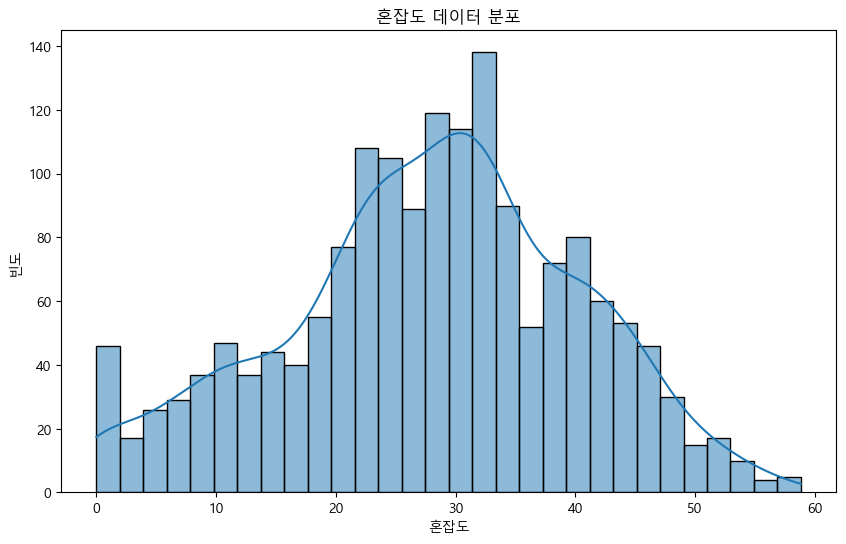

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18576\3704283253.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_avg_congestion.index, y=weekday_avg_congestion.values, palette='viridis')


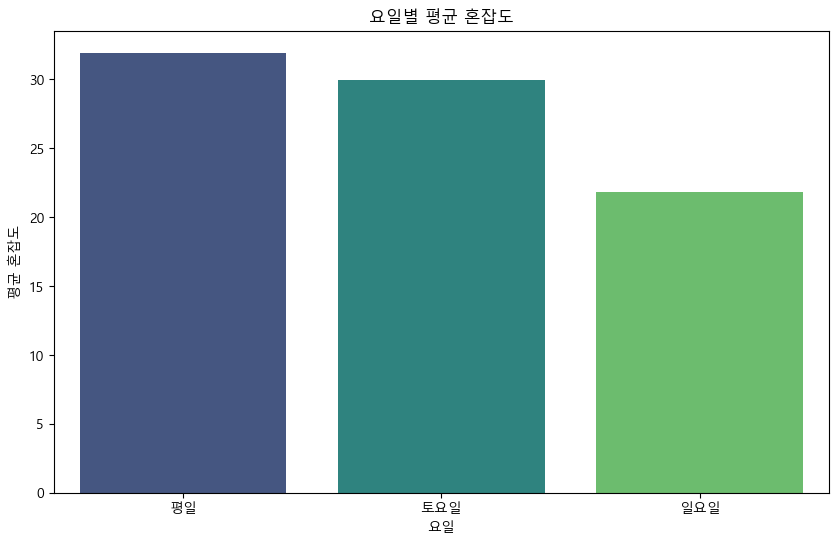

C:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


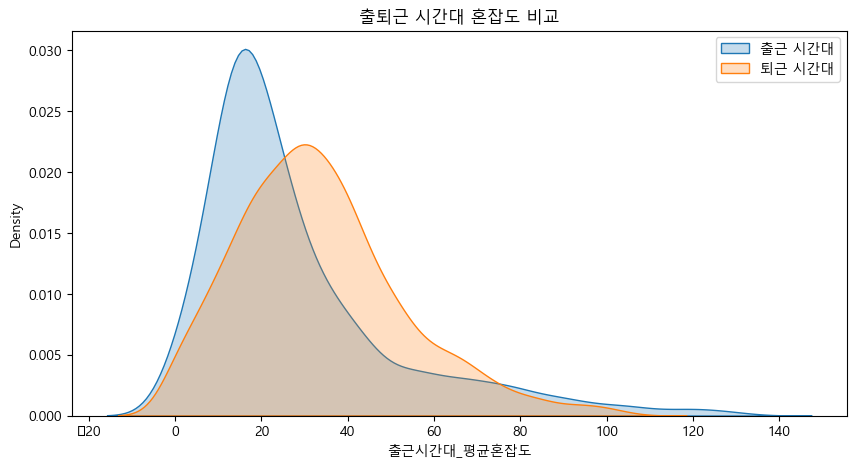

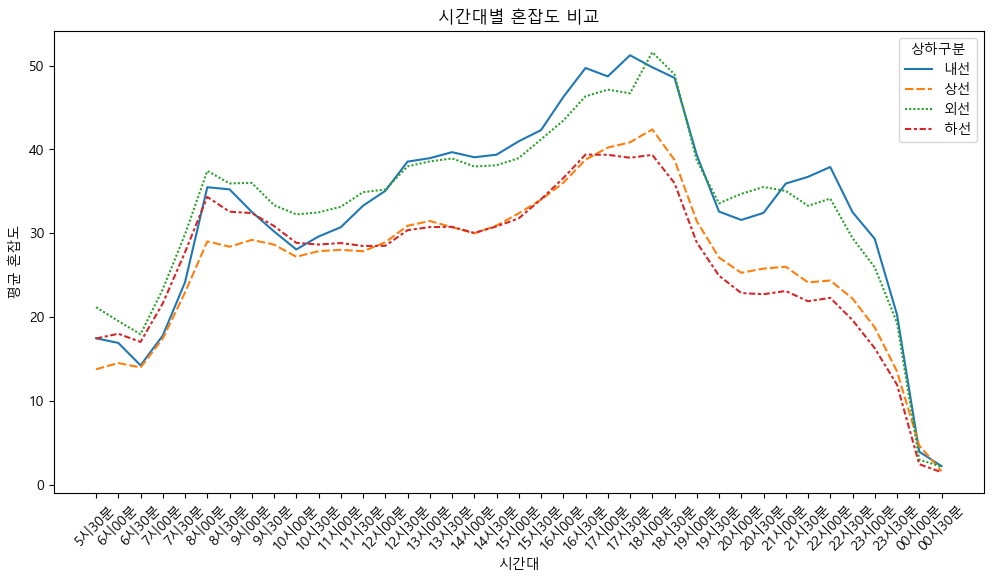

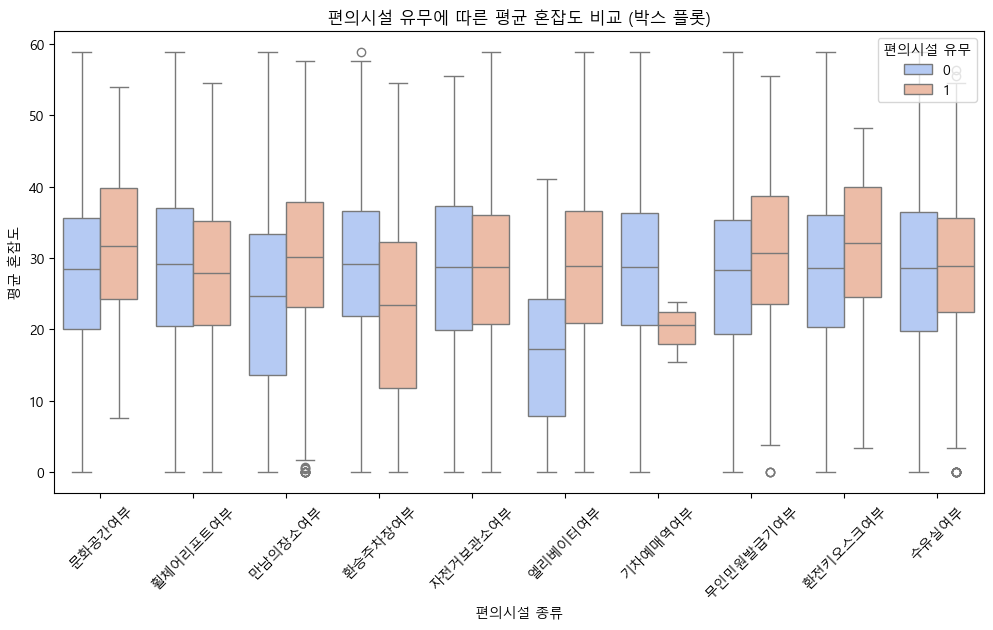

In [127]:
import platform
import matplotlib.font_manager as fm

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # Windows (맑은 고딕)
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')  # macOS (애플고딕)
else:
    plt.rc('font', family='NanumGothic')  # Linux (나눔고딕)


# 평균 혼잡도 데이터의 빈도 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['평균혼잡도'], kde=True, bins=30)
plt.title('혼잡도 데이터 분포')
plt.xlabel('혼잡도')
plt.ylabel('빈도')
plt.show()


# 1.요일별 평균 혼잡도 시각화
df['평균혼잡도'] = df.loc[:, '5시30분':'00시30분'].mean(axis=1)
weekday_avg_congestion = df.groupby('요일구분')['평균혼잡도'].mean().reindex(['평일', '토요일', '일요일'])

plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_avg_congestion.index, y=weekday_avg_congestion.values, palette='viridis')
plt.title('요일별 평균 혼잡도')
plt.xlabel('요일')
plt.ylabel('평균 혼잡도')
plt.show()


# 2. 출퇴근 시간대 혼잡도 시각화
df['출근시간대_평균혼잡도'] = df[['7시00분', '7시30분', '8시00분', '8시30분', '9시00분']].mean(axis=1)
df['퇴근시간대_평균혼잡도'] = df[['18시00분', '18시30분', '19시00분', '19시30분', '20시00분']].mean(axis=1)

plt.figure(figsize=(10, 5))
sns.kdeplot(df['출근시간대_평균혼잡도'], label='출근 시간대', fill=True)
sns.kdeplot(df['퇴근시간대_평균혼잡도'], label='퇴근 시간대', fill=True)
plt.legend()
plt.title('출퇴근 시간대 혼잡도 비교')
plt.show()


# 3. 시간대별 상하구분 평균 혼잡도 시각화
time_columns = df.loc[:, '5시30분':'00시30분'].columns
df_time_mean = df.groupby('상하구분')[time_columns].mean().T

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time_mean)
plt.title('시간대별 혼잡도 비교')
plt.xlabel('시간대')
plt.ylabel('평균 혼잡도')
plt.legend(title='상하구분')
plt.xticks(rotation=45)
plt.show()


# 4. 편의시설 유무에 따른 혼잡도 시각화
facility_cols = ['문화공간여부', '휠체어리프트여부', '만남의장소여부', '환승주차장여부', '자전거보관소여부',
                 '엘리베이터여부', '기차예매역여부', '무인민원발급기여부', '환전키오스크여부', '수유실여부']

df[facility_cols] = df[facility_cols].astype(str).applymap(lambda x: 1 if x.strip() == 'Y' else 0)
facility_melted = df.melt(id_vars=['평균혼잡도'], value_vars=facility_cols,
                          var_name='편의시설', value_name='유무')

plt.figure(figsize=(12, 6))
sns.boxplot(x='편의시설', y='평균혼잡도', hue='유무', data=facility_melted, palette='coolwarm')

plt.xticks(rotation=45)
plt.title('편의시설 유무에 따른 평균 혼잡도 비교 (박스 플롯)')
plt.xlabel('편의시설 종류')
plt.ylabel('평균 혼잡도')
plt.legend(title='편의시설 유무', loc='upper right')

plt.show()

# 3. 모델링

## 3-1. 클러스터링

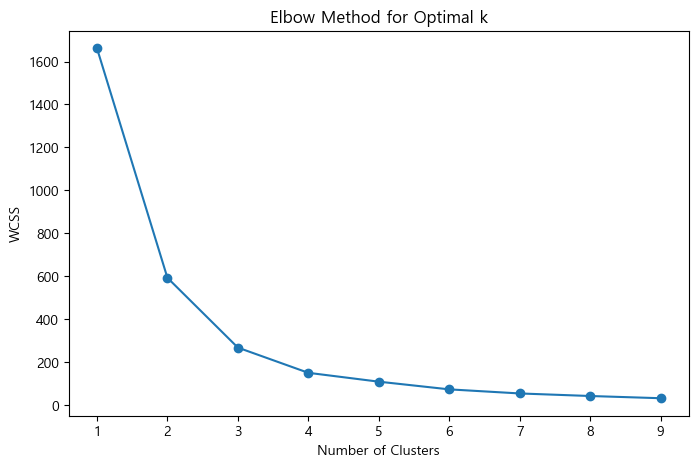

In [45]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 출발역을 카테고리로 변환 후 매핑 생성
df['출발역'] = df['출발역'].astype('category')
역_매핑 = dict(enumerate(df['출발역'].cat.categories))  # 숫자 → 출발역 매핑 생성

# 출발역을 숫자로 변환
df['출발역_코드'] = df['출발역'].cat.codes

# 혼잡도 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['평균혼잡도']])

# 최적의 클러스터 수 결정 (Elbow Method)
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

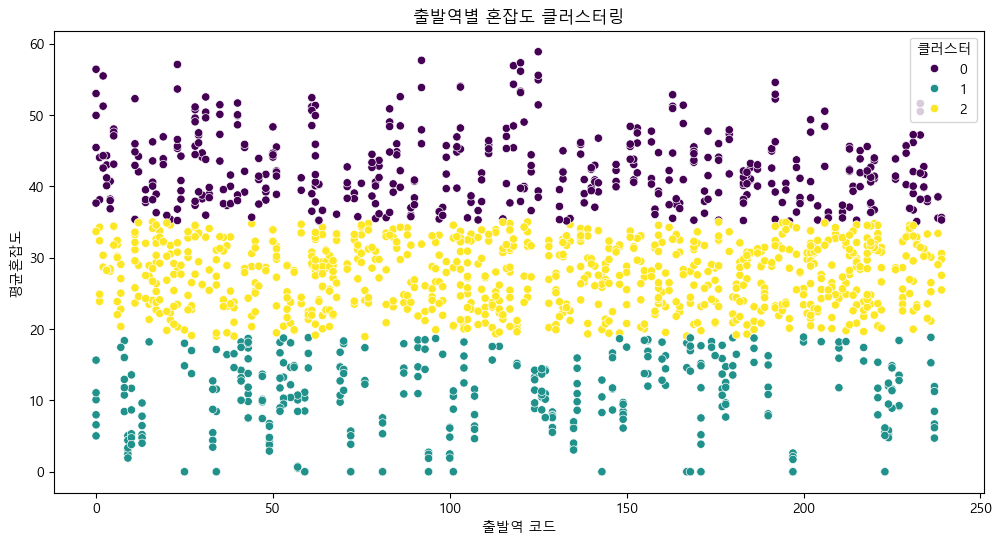

클러스터 0에 속한 역: ['시청' '을지로입구' '을지로3가' '을지로4가' '동대문역사문화공원' '신당' '상왕십리' '왕십리' '잠실새내' '종합운동장'
 '삼성' '선릉' '역삼' '강남' '교대' '서초' '방배' '사당' '낙성대' '서울대입구' '봉천' '신림' '신대방'
 '구로디지털단지' '대림' '신도림' '문래' '영등포구청' '당산' '합정' '홍대입구' '신촌(지하)' '이대' '아현'
 '충정로' '잠실' '홍제' '무악재' '독립문' '경복궁' '안국' '종로3가' '충무로' '동대입구' '약수' '금호' '옥수'
 '압구정' '신사' '잠원' '고속터미널' '남부터미널' '녹번' '미아삼거리' '길음' '성신여대입구' '한성대입구' '혜화'
 '동대문' '명동' '회현' '남태령' '오목교' '양평' '여의도' '여의나루' '마포' '공덕' '애오개' '서대문' '마장'
 '답십리' '장한평' '군자' '아차산' '광나루' '천호' '강동' '길동' '굽은다리' '명일' '고덕' '목동' '신길'
 '광화문' '청구' '신금호' '행당' '창신' '보문' '동묘앞' '중화' '상봉' '면목' '사가정' '용마산' '중곡'
 '어린이대공원' '건대입구' '자양(뚝섬한강공원)' '청담' '강남구청' '학동' '논현' '반포' '내방' '총신대입구' '남성'
 '숭실대입구' '상도' '장승배기' '남구로' '가산디지털단지' '철산' '광명사거리' '강동구청' '몽촌토성' '석촌' '송파'
 '가락시장' '문정' '장지' '복정' '한양대' '뚝섬' '서울역' '마포구청' '망원' '효창공원앞' '삼각지']
클러스터 1에 속한 역: ['용답' '신답' '신설동' '용두' '까치산' '신정네거리' '학여울' '대청' '일원' '수서' '가락시장' '경찰병원'
 '오금' '대치' '당고개' '상계' '노원' '창동' '방화' '개화산' '김포공항' '송정' '마곡' '발산' '개롱' '거여'
 '마천' '하남풍산' '하남시청' '하남검단산' 

In [46]:
# 최적 k=3으로 K-Means 수행
kmeans = KMeans(n_clusters=3, random_state=42)
df['클러스터'] = kmeans.fit_predict(X_scaled)

# 클러스터별 혼잡도 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='출발역_코드', y='평균혼잡도', hue='클러스터', palette='viridis')
plt.title('출발역별 혼잡도 클러스터링')
plt.xlabel('출발역 코드')
plt.ylabel('평균혼잡도')
plt.show()


# 숫자 코드 → 출발역 이름으로 변환
df['출발역_이름'] = df['출발역_코드'].map(역_매핑)

# 클러스터별 출발역 추출
cluster_stations = {i: df[df['클러스터'] == i]['출발역_이름'].unique() for i in range(3)}
for cluster, stations in cluster_stations.items():
    print(f"클러스터 {cluster}에 속한 역:", stations)

In [47]:
# 클러스터별 평균 혼잡도 비교
cluster_avg_congestion = df.groupby('클러스터')['평균혼잡도'].mean()

print("클러스터별 평균 혼잡도:")
print(cluster_avg_congestion)

클러스터별 평균 혼잡도:
클러스터
0    42.500786
1    10.262066
2    27.527447
Name: 평균혼잡도, dtype: float64


In [48]:
# 클러스터별 주요 역 상위 5개씩 출력
for cluster in range(3):
    print(f"클러스터 {cluster} 상위 5개 역:", df[df['클러스터'] == cluster]['출발역_이름'].value_counts().head(5))

클러스터 0 상위 5개 역: 출발역_이름
동대문역사문화공원    9
을지로3가        8
군자           8
교대           7
충무로          7
Name: count, dtype: int64
클러스터 1 상위 5개 역: 출발역_이름
오금     10
노원     10
연신내     8
수진      6
마천      6
Name: count, dtype: int64
클러스터 2 상위 5개 역: 출발역_이름
종로3가    14
서울역     11
삼각지     11
청구      11
동묘앞     10
Name: count, dtype: int64


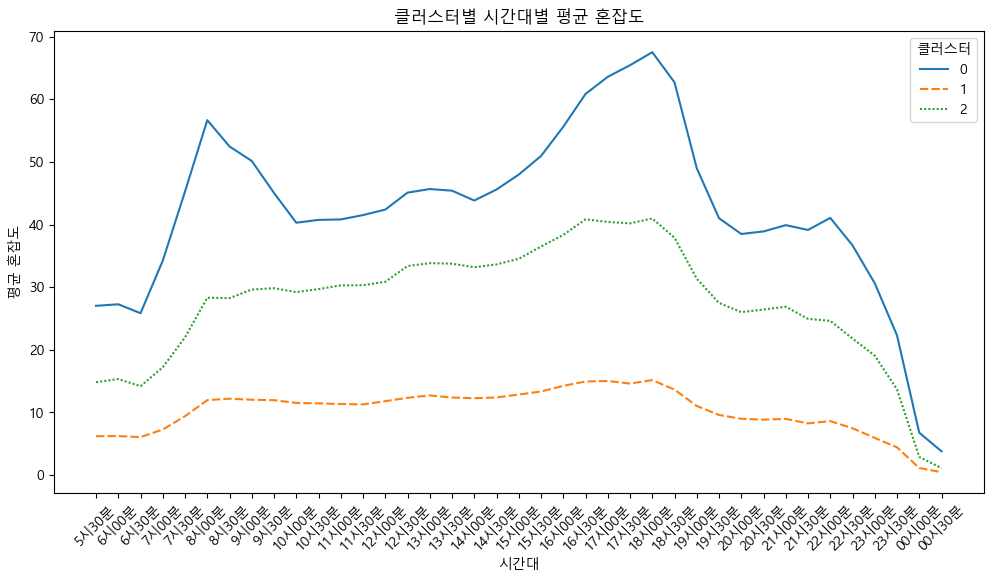

In [49]:
time_columns = df.loc[:, '5시30분':'00시30분'].columns
df_time_cluster = df.groupby('클러스터')[time_columns].mean().T

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time_cluster)
plt.title('클러스터별 시간대별 평균 혼잡도')
plt.xlabel('시간대')
plt.ylabel('평균 혼잡도')
plt.legend(title='클러스터')
plt.xticks(rotation=45)
plt.show()

In [52]:
features = ['출발역_코드', '요일구분', '상하구분']
time_columns = df.loc[:, '5시30분':'00시30분'].columns  # 시간대별 혼잡도 포함
features.extend(time_columns)  # 시간별 혼잡도도 Feature로 추가

# 범주형 변수 숫자로 변환 (Label Encoding)
df['출발역_코드'] = df['출발역'].astype('category').cat.codes
df['요일구분'] = df['요일구분'].astype('category').cat.codes
df['상하구분'] = df['상하구분'].astype('category').cat.codes

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

X = df[features]
y = df['평균혼잡도']

# 데이터 분할 (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest 회귀 모델
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost 회귀 모델
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

#성능 평가 (MAE, RMSE, R²)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"Random Forest MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}, R2: {rf_r2:.2f}")
print(f"XGBoost MAE: {xgb_mae:.2f}, RMSE: {xgb_rmse:.2f}, R2: {xgb_r2:.2f}")


Random Forest MAE: 0.78, RMSE: 1.06, R2: 0.99
XGBoost MAE: 0.77, RMSE: 0.98, R2: 0.99


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

X = df[features]
y = df['클러스터']  # 클러스터를 예측하는 분류 모델

# 데이터 분할 (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest 분류 모델
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# XGBoost 분류 모델
xgb_clf = XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

#성능 평가 (Accuracy Score)
rf_acc = accuracy_score(y_test, y_pred_rf)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

print(f"Random Forest Accuracy: {rf_acc:.2f}")
print(f"XGBoost Accuracy: {xgb_acc:.2f}")

#분류 모델 성능 분석
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Random Forest Accuracy: 0.96
XGBoost Accuracy: 0.96
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        90
           1       0.99      0.99      0.99        69
           2       0.95      0.98      0.97       174

    accuracy                           0.96       333
   macro avg       0.97      0.96      0.96       333
weighted avg       0.96      0.96      0.96       333

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        90
           1       1.00      0.97      0.99        69
           2       0.95      0.98      0.97       174

    accuracy                           0.96       333
   macro avg       0.97      0.96      0.96       333
weighted avg       0.96      0.96      0.96       333

